In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
x_train=np.load("/content/drive/My Drive/BienSoXe/x_train.npy")
y_train=np.load("/content/drive/My Drive/BienSoXe/y_train.npy")
x_test=np.load("/content/drive/My Drive/BienSoXe/x_test.npy")
y_test=np.load("/content/drive/My Drive/BienSoXe/y_test.npy")

In [3]:
print(x_train.shape)
print(x_test.shape)

(9000, 303, 472, 3)
(1482, 303, 472, 3)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
import tensorflow as tf
def cnn_model(input_shape):
    start_neurals=4
    model=Sequential()

    model.add(Conv2D(start_neurals, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(start_neurals, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(start_neurals*2, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(start_neurals*2, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(start_neurals*4, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(start_neurals*4, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(start_neurals*8, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(start_neurals*8, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(start_neurals*8, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(start_neurals*8, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(start_neurals*8, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(start_neurals*8, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(4, activation='relu'))

    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [5]:
model=cnn_model((303,472,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 303, 472, 4)       112       
_________________________________________________________________
batch_normalization (BatchNo (None, 303, 472, 4)       16        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 303, 472, 4)       148       
_________________________________________________________________
batch_normalization_1 (Batch (None, 303, 472, 4)       16        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 151, 236, 4)       0         
_________________________________________________________________
dropout (Dropout)            (None, 151, 236, 4)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 151, 236, 8)       2

In [13]:
model.load_weights("/content/drive/My Drive/BienSoXe/weight.h5")

In [7]:
import datetime
log_dir = "/content/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/100
141/141 [==============================] - 22s 154ms/step - loss: 9893.4219 - accuracy: 0.3730 - val_loss: 12845.5723 - val_accuracy: 0.4696
Epoch 2/100
141/141 [==============================] - 20s 145ms/step - loss: 3726.1360 - accuracy: 0.6592 - val_loss: 5383.6265 - val_accuracy: 0.6046
Epoch 3/100
141/141 [==============================] - 20s 145ms/step - loss: 1744.1697 - accuracy: 0.7526 - val_loss: 2121.3892 - val_accuracy: 0.8009
Epoch 4/100
141/141 [==============================] - 20s 144ms/step - loss: 972.9129 - accuracy: 0.8342 - val_loss: 1121.0021 - val_accuracy: 0.8090
Epoch 5/100
141/141 [==============================] - 20s 145ms/step - loss: 663.8387 - accuracy: 0.8696 - val_loss: 594.5330 - val_accuracy: 0.8738
Epoch 6/100
141/141 [==============================] - 20s 144ms/step - loss: 501.9037 - accuracy: 0.8856 - val_loss: 922.4174 - val_accuracy: 0.8677
Epoch 7/100
141/141 [==============================] - 20s 144ms/step - loss: 434.8081 - acc

In [8]:
#46

[[144.78983  117.36581   80.020256  65.277336]]


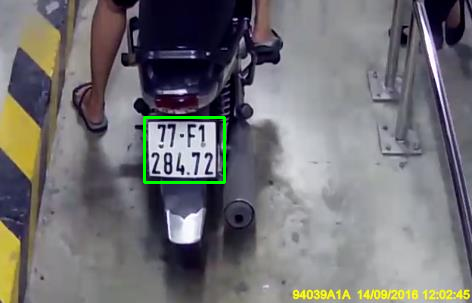

In [26]:
import copy
rand=np.random.randint(x_test.shape[0])
img=copy.copy(x_test[rand])
reshaped=np.reshape(img, (1,img.shape[0], img.shape[1], img.shape[2]))
rect=model.predict(reshaped)
print(rect)
cv2.rectangle(img,(int(rect[0][0]),int(rect[0][1])),(int(rect[0][0]+rect[0][2]), int(rect[0][1]+rect[0][3])),(0,255,0),2)
cv2_imshow(img)

In [10]:
#model.save_weights("/content/drive/My Drive/BienSoXe/weight.h5")

In [11]:
model_json = model.to_json()
with open("/content/drive/My Drive/BienSoXe/model.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
!zip -r /content/logs.zip /content/logs

  adding: content/logs/ (stored 0%)
  adding: content/logs/fit/ (stored 0%)
  adding: content/logs/fit/20200630-130108/ (stored 0%)
  adding: content/logs/fit/20200630-130108/train/ (stored 0%)
  adding: content/logs/fit/20200630-130108/train/plugins/ (stored 0%)
  adding: content/logs/fit/20200630-130108/train/plugins/profile/ (stored 0%)
  adding: content/logs/fit/20200630-130108/train/plugins/profile/2020_06_30_13_01_17/ (stored 0%)
  adding: content/logs/fit/20200630-130108/train/plugins/profile/2020_06_30_13_01_17/39fec3b005ac.overview_page.pb (deflated 58%)
  adding: content/logs/fit/20200630-130108/train/plugins/profile/2020_06_30_13_01_17/39fec3b005ac.input_pipeline.pb (deflated 57%)
  adding: content/logs/fit/20200630-130108/train/plugins/profile/2020_06_30_13_01_17/39fec3b005ac.tensorflow_stats.pb (deflated 74%)
  adding: content/logs/fit/20200630-130108/train/plugins/profile/2020_06_30_13_01_17/39fec3b005ac.trace.json.gz (deflated 0%)
  adding: content/logs/fit/20200630-1301